# Analyzing text

In [1]:
# Imports
import re # Regex - Regular expressions for matching words/characters
import timeit
import numpy as np
from scipy import sparse
from collections import Counter
import matplotlib.pyplot as plt

## Load text and extract words

In [2]:
def extract_words(text):
    """Finds all words in a text string"""
    words = re.findall(r"[\w']+", text)

    words = list(map(lambda w: w.upper(), words))
    return words

def extract_characters(text):
    """Finds all characters in a text string"""
    characters = re.findall(r"[a-z A-Z]", text)
    
    characters = list(map(lambda c: c.upper(), characters))
    return characters

# NOT IMPLEMENTED
def remove_names(words):
    return None

In [3]:
text_name = 'Pride and Prejudice'

symbols = []
with open(f'books/{text_name}.txt', 'r', encoding="utf8") as f:
    contents = f.readlines()
    for line in contents:
        x = extract_words(line)
        # x = extract_characters(line)
        symbols.extend(x)

n_symbols = len(symbols)
print(f"Total number of symbols in the text '{text_name}' is {n_symbols}")

Total number of symbols in the text 'Pride and Prejudice' is 123007


## Calculate the frequencies of all unique words

In [35]:
frequencies = dict(Counter(symbols))
labels, values = zip(*frequencies.items())
descending = np.argsort(values)[::-1]
unique_symbols = np.array(labels)[descending]

number_of_unique_symbols = len(unique_symbols)
print(f'The number of unique symbols are {number_of_unique_symbols}')

most_common = max(frequencies, key=frequencies.get)
print(f"The most common symbol is '{most_common}'. it occures {frequencies[most_common]} times. The rate is {frequencies[most_common]/n_symbols}")

The number of unique symbols are 6466
The most common symbol is 'THE'. it occures 4331 times. The rate is 0.03520937832806263


## Frequency plot

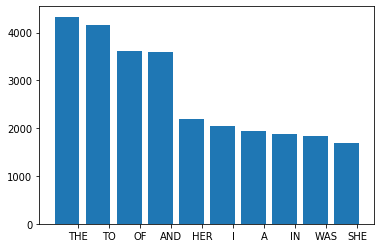

In [5]:
counts = dict(Counter(symbols).most_common(10))

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

## Calculate frequencies of sequences

In [38]:
# np.zeros(number_of_unique_symbols)
unique_symbols = list(unique_symbols)
frequencies2 = sparse.csr_matrix((number_of_unique_symbols, number_of_unique_symbols), dtype='int')

for previous, current in zip(symbols[:-1], symbols[1:]):
    index_previous = unique_symbols.index(previous)
    index_current = unique_symbols.index(current)

    frequencies2[index_previous, index_current] += 1

In [51]:
i1 = 9
i2 = 8


print(f"Sequence '{unique_symbols[i1]} {unique_symbols[i2]}' occurs {frequencies2[i1, i2]} times")
unique_symbols[index_previous]

frequency_max = frequencies2.max()
i_max = frequencies2.argmax()

print(frequency_max, i_max)

print(unique_symbols[:10])
print(frequencies2[:10, :10].todense())

Sequence 'SHE WAS' occurs 209 times
464 12932
['THE', 'TO', 'OF', 'AND', 'HER', 'I', 'A', 'IN', 'WAS', 'SHE']
[[  0   0   0   0   0   0   0   0   0   0]
 [252   0   0   2 173   0  42   0   1   1]
 [464   1   1   3 260   3 110   3   0   1]
 [162  48  33   0  87 124  38  51  48 111]
 [ 22  59  15  57   3  10  18  23   9  27]
 [  0   3   0   1   0   1   0   0  66   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [382   2   0   5  95   2 134   0   0   1]
 [ 51  58  11   5  11   3  84  41   0   8]
 [  0   4   0   8   0  11   0   1 209   0]]


## Save files

In [ ]:
import json
with open(f'frequencies/{text_name}.json', 'w', encoding="utf8") as f:
    json.dump(frequencies, f)